### Build a Decision Tree model for the iris dataset in order to predict the species of an iris flower based on the values of four numerical variables. 

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('data/iris.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/iris.csv'

### Explore the data

In [4]:
# print("Rows", len(df))
# print("Columns", len(df.columns))
print(df.shape)

(150, 5)


In [5]:
# Numeric variables
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Variables have roughly similar ranges of values**

In [6]:
# Target variable
print(df.species.value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


**Equal numbers of each class**

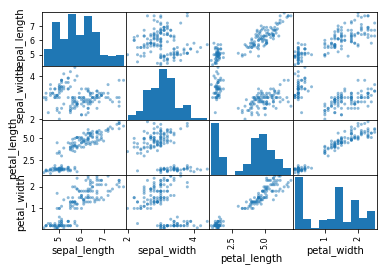

In [7]:
# scatter matrix
scatter_matrix(df)
plt.show()

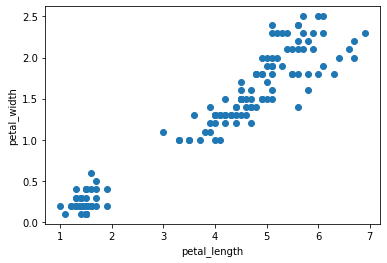

In [8]:
# Lets have a closer look at the petal_length and petal_width
plt.scatter(df.petal_length, df.petal_width)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

**Looks as if there an easy separation between one of the classes and the other two, based on petal_length and petal_width. Also with other pairs of features.**

In [4]:
# Find the sepal_length values for setosa's
d = df.to_numpy()
# print(d)
print(d[d[:,4] == "setosa", 0])

NameError: name 'df' is not defined

In [3]:
# sepal_length and sepal_width for each species? 
#d = np.array(df)
plt.scatter(
    d[d[:4] == "setosa", 0], d[d[:4] == "setosa", 1],
    c='lightgreen', marker='s', edgecolor='black',
    label='setosa'
)


plt.scatter(
    d[d[:,4] == "versicolor", 0], d[d[:,4] == "versicolor", 1],
    c='orange', marker='o', edgecolor='black',
    label='versicolor'
)
plt.scatter(
    d[d[:,4] == "virginica", 0], d[d[:,4] == "virginica", 1],
    c='lightblue', marker='v', edgecolor='black',
    label='virginica'
)

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc="upper left")

plt.show()

NameError: name 'df' is not defined

**sepal_length and sepal_width seperates the setosa. Not so good seperating the other two.**

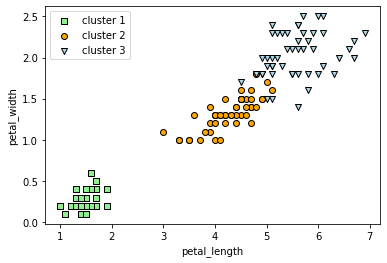

In [11]:
# Do petal_length and petal_width seperate the classes? 

plt.scatter(
    d[d[:,4] == "setosa", 2], d[d[:,4] == "setosa", 3],
    c='lightgreen', marker='s', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    d[d[:,4] == "versicolor", 2], d[d[:,4] == "versicolor", 3],
    c='orange', marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    d[d[:,4] == "virginica", 2], d[d[:,4] == "virginica", 3],
    c='lightblue', marker='v', edgecolor='black',
    label='cluster 3'
)

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(loc="upper left")

plt.show()

**petal_length and petal_width seem to work even better. Looks good for classification model**

### Build a model

In [47]:
# X = df[["sepal_length","sepal_width","petal_length","petal_width"]].to_numpy()
# y = df[["species"]].to_numpy()
# print(X.shape)
# print(y.shape)

# X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
X = df.drop('species', axis='columns')
y = df.species
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [48]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, 
                                                    random_state=1, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125, 4)
(125,)
(25, 4)
(25,)


In [51]:
# Create the decision tree
model = DecisionTreeClassifier(max_depth=10)
# tree = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.get_depth()

6

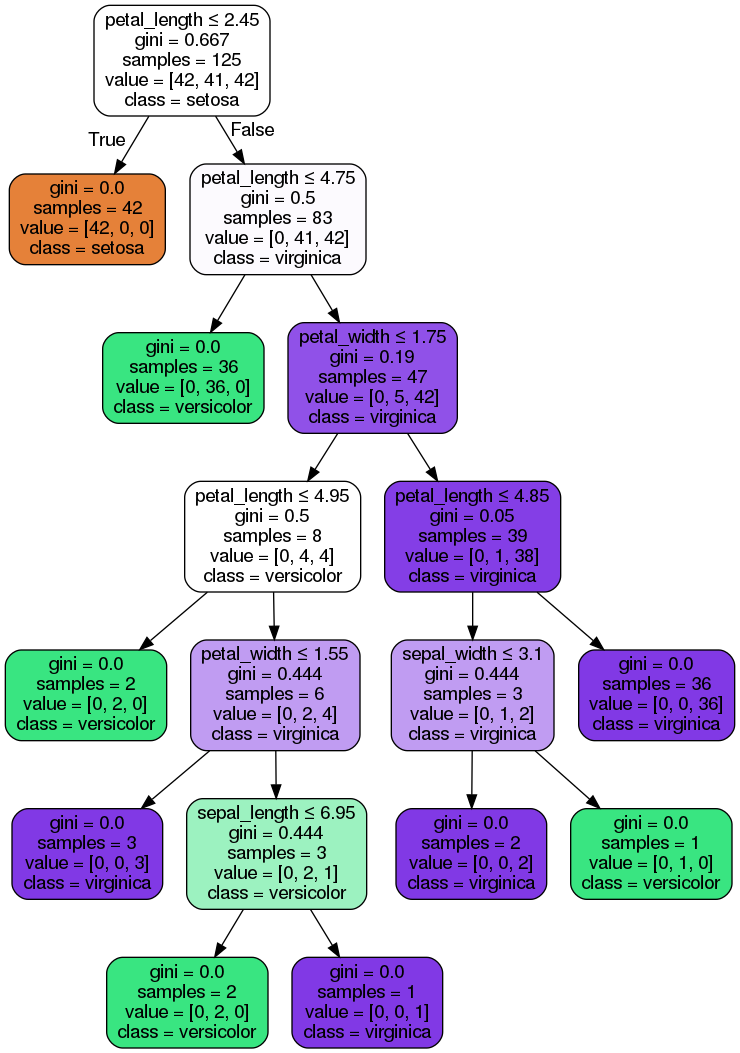

In [52]:
# Draw the tree
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/iris.png')
Image(graph.create_png())

### Evaluate the Model

In [53]:
# Training Accuracy
print("Training Accuracy:", model.score(X_train, y_train))

Training Accuracy: 1.0


In [54]:
# Test Accuracy
print("Test Accuracy:", model.score(X_test, y_test))

Test Accuracy: 0.96


In [55]:
# Get predictions
y_hat = model.predict(X_test)
# print(y_test)
# print(y_hat)
# print(y_hat.shape)

In [56]:
cm = confusion_matrix(y_test, y_hat)
# cm = confusion_matrix(y_test, y_hat, labels=['setosa', 'versicolor', 'virginica'])
print(cm)

[[8 0 0]
 [0 9 0]
 [0 1 7]]


**Note: Perfect seperation of the setosa (first row and column).
    One incorrectly classified instance, a virginica, classified as a versicolor.**